In [1]:
"""
K-means is vastly used for clustering in many data science applications,
especially useful if you need to quickly discover insights from unlabeled data.
"""

'\nK-means is vastly used for clustering in many data science applications,\nespecially useful if you need to quickly discover insights from unlabeled data.\n'

In [2]:
#import the required libraries
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [3]:
#k-Means on a randomly generated dataset
#Use numpy's random.seed() function, where the seed will be set to 0
np.random.seed(0)

In [4]:
#making random clusters of points by using the make_blobs class
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

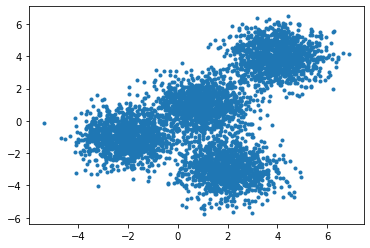

In [5]:
#display scatter plot of the randomly generated data
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [6]:
#set up K means parameters
#init: Initialization method of the centroids.
#Value will be: "k-means++"
#k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#n_clusters: The number of clusters to form as well as the number of centroids to generate.
#Value will be: 4 (since we have 4 centers)
#n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Value will be: 12

In [7]:
#initialize output parameter to kmeans
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
#fit the KMeans model with the feature matrix, X
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
#grab the labels for each point in the model using KMeans' .labels_ attribute and save it as k_means_labels
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [11]:
#coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

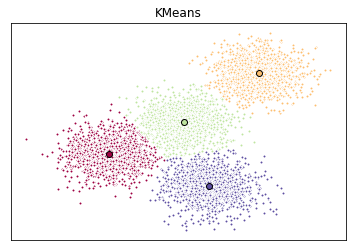

In [12]:
#crating the visual plot

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


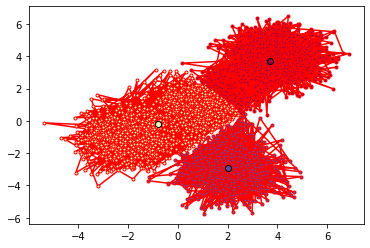

In [17]:
#use three clusters

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'r', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [18]:
#customer segmentation with K-means

#load data from the csv
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv

--2021-09-20 22:33:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.001s  

2021-09-20 22:33:06 (47.3 MB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



In [19]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [20]:
#pre-processing
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [21]:
#normalizing over the standard deviation

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [22]:
#modeling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [23]:
#insights
#assign the labels to each row in a data frame
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [24]:
#check the centroid values by averaging the features in each cluster.

df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


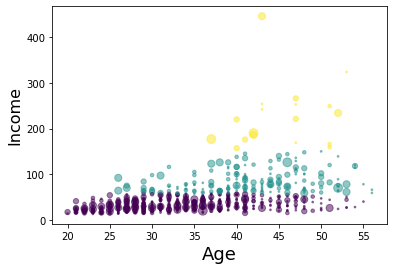

In [27]:
#findin the distribution of customers based on their age and income:

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
